# Pandas

In [1]:
import pandas as pd

## Series 생성 및 속성

In [3]:
data = [10, 30, 30]
sr = pd.Series(data)
sr

,0
0,10
1,30
2,30


In [5]:
sr.index, sr.values

(RangeIndex(start=0, stop=3, step=1), array([10, 30, 30]))

In [10]:
sr.name = 'Score'
sr

,Score
0,10
1,30
2,30


In [11]:
sr.shape

(3,)

In [12]:
data = [10, 30, 30]
sr = pd.Series(data, index=['a', 'b', 'c'])
sr

,0
a,10
b,30
c,30


In [13]:
data = {'a':10, 'b': 20, 'c': 20}
pd.Series(data)

,0
a,10
b,20
c,20


## DataFrame 생성과 속성

In [16]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'John'],
    'Age': [25, 30, 28, 27],
    'Gender': [1, 0, 1, 1]
}

df = pd.DataFrame(data)
df

,Name,Age,Gender
0,Alice,25,1
1,Bob,30,0
2,Charlie,28,1
3,John,27,1


In [17]:
df.shape

(4, 3)

In [18]:
df.head()

,Name,Age,Gender
0,Alice,25,1
1,Bob,30,0
2,Charlie,28,1
3,John,27,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   Gender  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


## 필터링 및 슬라이싱

In [20]:
df['Name']

,Name
0,Alice
1,Bob
2,Charlie
3,John


In [22]:
type(df['Name'])

pandas.core.series.Series

In [26]:
df[['Name', 'Age']]

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,28
3,John,27


In [28]:
type(df[['Name', 'Age']])

pandas.core.frame.DataFrame

In [29]:
df[['Name']]

,Name
0,Alice
1,Bob
2,Charlie
3,John


In [30]:
type(df[['Name']])

pandas.core.frame.DataFrame

In [31]:
df.Name

,Name
0,Alice
1,Bob
2,Charlie
3,John


In [32]:
df['Age'] > 26

,Age
0,False
1,True
2,True
3,True


In [33]:
df[df['Age'] > 26]

,Name,Age,Gender
1,Bob,30,0
2,Charlie,28,1
3,John,27,1


In [36]:
import numpy as np

In [65]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'John'],
    'Age': [25, 30, np.nan, 27],
    'Gender': [1, 0, 1, 1]
}

df = pd.DataFrame(data)
df

,Name,Age,Gender
0,Alice,25.0,1
1,Bob,30.0,0
2,Charlie,NaN,1
3,John,27.0,1


In [38]:
df[df['Age'].notna()]

,Name,Age,Gender
0,Alice,25.0,1
1,Bob,30.0,0
3,John,27.0,1


In [39]:
df[(df['Age'].notna()) & (df['Gender'] == 0)]

,Name,Age,Gender
1,Bob,30.0,0


- iloc
- loc

In [41]:
df.iloc[0, 0]

'Alice'

In [47]:
# 2까지 포함해서 가져온다 주의!
df.loc[0:2, ['Name', 'Gender']]

,Name,Gender
0,Alice,1
1,Bob,0
2,Charlie,1


In [48]:
df.loc[df['Age'] > 26, ['Name', 'Gender']]

,Name,Gender
1,Bob,0
3,John,1


In [49]:
df['Age'] * 2

,Age
0,50.0
1,60.0
2,NaN
3,54.0


In [55]:
df['Agex2'] = df['Age'] * 2
df

,Name,Age,Gender,Agex2
0,Alice,25.0,1,50.0
1,Bob,30.0,0,60.0
2,Charlie,NaN,1,NaN
3,John,27.0,1,54.0


In [57]:
df = df.drop(['Age'], axis=1)

In [58]:
df

,Name,Gender,Agex2
0,Alice,1,50.0
1,Bob,0,60.0
2,Charlie,1,NaN
3,John,1,54.0


In [60]:
df.dropna()

,Name,Gender,Agex2
0,Alice,1,50.0
1,Bob,0,60.0
3,John,1,54.0


In [64]:
df['Age'] = df['Age'].fillna(0)
df

,Name,Age,Gender
0,Alice,25.0,1
1,Bob,30.0,0
2,Charlie,0.0,1
3,John,27.0,1


## 데이터 집계 및 그룹화

In [71]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Jane'],
    'Age': [25, 30, 28, 27],
    'Gender': [1, 0, 1, 0],
    'Area': ['B', 'A', 'A', 'B']
}

df = pd.DataFrame(data)
df

,Name,Age,Gender,Area
0,Alice,25,1,B
1,Bob,30,0,A
2,Charlie,28,1,A
3,Jane,27,0,B


In [67]:
df.groupby('Gender')['Age'].sum()

,Age
Gender,
0,57
1,53


In [72]:
df.groupby(['Gender', 'Area'])['Age'].mean()

Gender  Area
0       A       30.0
        B       27.0
1       A       28.0
        B       25.0
Name: Age, dtype: float64

In [73]:
df['Area'].value_counts()

,count
Area,
B,2
A,2


<Axes: >

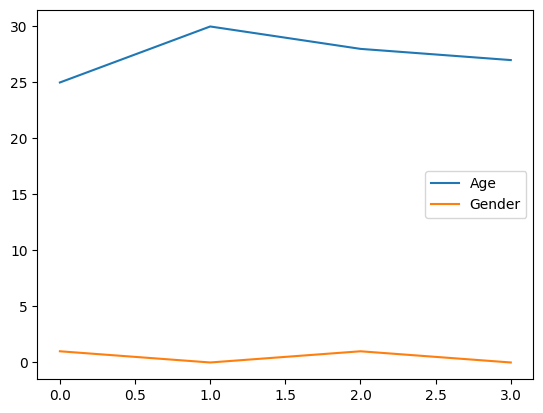

In [74]:
df.plot()